#  **MZ 신입의 눈으로 바라본 대학 교육과 직장 생활** 🔎

###   **💠 한국고용정보원 대졸자직업이동경로조사(2019) 데이터 분석 보고서**

# **I. 서론**

> 연구 목적

- 본 보고서는 "2019년 대졸자직업이동경로조사"를 기반으로 대졸자들의 취업 현황과 직업 이동 경로를 분석하여,  
  교육과 고용 정책 수립에 필요한 기초 자료를 제공하는 데 목적이 있음.  
- 이를 통해 대졸자들의 실질적인 직업 선택과 경로를 파악해, 보다 효율적인 취업 지원 방안을 모색하고자 함. 

> 배경 정보
- 주관 : 한국고용정보원  
- 대상 : 전국의 전문대학 및 대학교 졸업자의 3~4%  
   ※ *남성 졸업자 : 238,805명(48.3%) / 여성 졸업자 : 255,529명(51.7%)*
- 내용 : 대졸자의 직업, 근무 조건, 직업 만족도 등

> 기대 효과
- 교육과 고용 시장 간의 연계성 강화
- 취업 준비생 및 사회 초년생을 위한 참고 자료 기능

# **II. 데이터 개요**

## 기본 설정

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

import warnings
warnings.filterwarnings('ignore')


# OS에 따른 폰트 설정
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf' 

font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)


## 데이터 탐색

In [49]:
# 2019 대졸자직업이동경로 데이터셋

df = pd.read_csv('./data_anal_proj/GOMS2019.csv')

In [53]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Columns: 130 entries, 이직여부 to wt
dtypes: float64(4), int64(126)
memory usage: 11.6 MB


In [65]:
# 데이터 자료 구조
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

df.head()

,이직여부,majorcat,school,area,sex,age,graduy,a001,industry,job,a010,a011,a012,a014,a016,a018,a020,a021,a116,a117,a118,a119,a122,a125,a126,a127,a128,a129,a130,a131,a132,a133,a134,a135,a136,a137,a138,a139,a140,a141,a142,a143,a144,a145,a146,a151,a153,a158,a159,a160,a161,a162,a166,a168,a281,a282,a388,e001,f001,f004,f006,f008,f009,f010,f011,f013,f170,f023,f071,f072,f074,f079,f080,f081,f082,f083,f084,f085,f086,f101,f124,f138,g001,h001,i018,i050,j021,l001,n083,k001,k042,k043,k044,k045,k046,k047,k048,k049,k050,k051,k052,k053,k055,k056,k057,q015,q016,q017,p001,p014,p016,p017,p018,p020,p024,p028z,p031z,p035,p036,p046,p039,p041,p043,p045,r023,r024,r025,r026,r027,wt
0,2,1,1,8,1,21.750000,2018,2018,7,7,-1,3,1,8,1,0,1,1,5.0,25,0,0,112,112,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,6,1,2,2,1,2,1,1,1,2,2,2,6,1,2,2016,1,8,1,1,1,2016,2,7,1,2,3,4.1,70,0,0,30,0,0,0,2,2,2,2,2,1,2,1,2200,2,2,1,4,5,4,4,4,3,4,4,4,3,4,2,3,4,4,6,6,6,1,1,3,4,1,10,8,3,3,6,4,1,1008,2,2,6,30,0,0,0,1,20.945343
1,1,1,1,8,1,25.250000,2018,2018,7,1,2,2,1,1,6,1,1,1,5.0,45,3,5,180,180,2,2,3,3,2,3,2,2,2,2,2,3,3,2,2,2,2,3,3,6,3,5,1,1,2,1,1,1,3,2,4,1,1,2,2013,1,8,1,2,1,2013,2,7,1,3,3,3.9,80,0,5,15,0,0,0,2,1,1,2,2,1,2,1,2040,2,2,2,5,5,5,5,5,5,5,5,4,4,4,3,5,4,4,3,3,3,1,1,4,5,1,1,8,3,3,3,3,1,540,2,2,3,60,10,0,10,1,19.420393
2,2,1,1,8,1,24.500000,2018,2018,9,1,6,6,1,1,6,1,1,1,5.0,40,10,8,180,170,1,5,4,5,5,4,5,5,5,3,4,3,5,4,4,5,3,2,4,6,5,5,2,1,2,1,1,1,2,2,3,4,2,2,2014,1,5,1,1,1,2014,1,5,1,5,5,3.8,100,0,0,0,0,0,0,2,1,2,2,2,1,2,2,2000,1,2,1,5,5,5,5,4,5,5,3,5,4,5,1,5,2,2,6,7,7,1,1,3,2,1,5,5,3,3,6,4,1,1570,2,2,2,30,0,0,0,1,19.420393
3,2,1,1,10,1,26.000000,2018,2018,3,7,5,5,1,10,2,0,1,1,5.0,40,4,0,260,250,4,5,4,3,4,3,5,4,4,1,3,2,1,4,5,5,2,3,1,6,1,1,2,1,2,1,1,1,2,2,2,6,1,2,2013,1,10,1,1,1,2014,1,6,1,4,4,3.9,25,0,50,25,0,0,0,2,1,2,2,2,1,2,1,2600,2,2,2,5,5,5,3,4,5,4,5,5,5,5,1,5,1,1,1,7,4,1,2,1,1,1,10,10,6,5,7,4,3,1560,2,1,2,150,35,0,0,1,11.549823
4,2,1,1,1,2,25.083333,2017,2019,7,7,2,2,1,8,8,0,1,2,6.0,50,2,4,240,240,3,2,4,4,3,2,4,2,2,2,3,3,4,3,3,3,2,1,1,6,2,2,2,2,2,2,2,2,2,2,1,13,2,2,2015,1,8,1,1,1,2015,1,1,1,4,4,3.0,80,0,20,0,0,0,0,2,2,2,2,2,1,2,2,2500,2,2,2,5,4,4,3,4,4,5,5,5,4,4,3,4,3,3,5,6,4,1,2,6,2,1,1,8,3,1,6,1,3,0,2,-1,1,120,50,0,0,1,37.668984


In [195]:
# column 정보
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_c = pd.read_csv('./data_anal_proj/GOMS2019_columns.csv')
df_c

,columns,desc,label
0,majorcat,전공계열,"인문1, 사회2, 교육3, 공학4, 자연5, 의약6, 예체능7"
1,school,학교유형,"2~3년제(1), 4년제(2), 교육대(3)"
2,area,학교소재지,"서울1,부산2,대구3,대전4,인천5,광주6,울산7,경기8,강원9,충북10,충남11,..."
3,sex,성별,"남1, 여2"
4,age,연령,NaN
5,graduy,졸업년,NaN
6,a001,현 일자리 시작년,NaN
7,a010,기업체 종사자 수,"모름/무응답(-1), 1~4명(1), 5~9명(2), 10~29명(3), 30~49..."
8,a011,사업체 종사자 수,"모름/무응답(-1), 1~4명(1), 5~9명(2), 10~29명(3), 30~49..."
9,a012,사업체 위치(국내/국외),NaN


**[변수 탐색]**

- 범주형 변수 : majorcat, schoolarea, sex, industry, job 등
- 수치형 변수 : age, a116(정규 근로일), a117(주당 정규 근로시간), a118(주당 초과 근로시간), a119(월평균 휴일 근로), a122(월평균 근로소득), a125(초임 월평균 근로소득), f074(졸업평점), f079~f84(등록금 조달방법-부모,  학자금 대출, 본인, 장학금, 배우자), j021(유보연봉),  p017(가구원수), p039(지난 해 소득), r023(전년도 월평균 생활비 지출액), r024(전년도 월평균 주거비 지출액), r025(전년도 월평균 공교육비 지출액), r026(전년도 월평균 사교육비 지출액)

In [43]:
# 데이터 통계량
columns_n = [
    'age', 'a116', 'a117', 'a118', 'a119', 'a122', 'a125', 'f074',
    'f079', 'f080', 'f081', 'f082', 'f083', 'f084', 'j021', 'p017',
    'p039', 'r023', 'r024', 'r025', 'r026'
]

df[columns_n].describe()

,age,a116,a117,a118,a119,a122,a125,f074,f079,f080,f081,f082,f083,f084,j021,p017,p039,r023,r024,r025,r026
count,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000,11652.000000
mean,26.879692,5.044971,40.711552,3.128991,0.538363,245.312908,221.610196,3.613174,45.268366,9.447048,4.725026,40.274545,0.091057,0.132424,2942.006351,2.483093,2023.725712,90.796258,17.103673,7.432029,7.392207
std,4.467500,0.445746,7.086318,5.367781,1.467113,105.989095,94.868042,0.430819,40.388286,23.046557,16.563906,38.011421,2.767790,2.598149,941.177686,1.439528,2609.275410,99.663567,66.773162,45.669087,57.890833
min,21.000000,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,24.833333,5.000000,40.000000,0.000000,0.000000,194.000000,180.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2400.000000,1.000000,800.000000,50.000000,0.000000,0.000000,0.000000
50%,26.250000,5.000000,40.000000,0.000000,0.000000,230.000000,200.000000,3.700000,40.000000,0.000000,0.000000,30.000000,0.000000,0.000000,3000.000000,2.000000,1980.000000,80.000000,3.000000,0.000000,0.000000
75%,27.500000,5.000000,40.000000,5.000000,0.000000,288.250000,258.250000,3.900000,90.000000,0.000000,0.000000,80.000000,0.000000,0.000000,3000.000000,4.000000,2800.000000,100.000000,30.000000,0.000000,2.000000
max,71.083333,7.000000,140.000000,50.000000,10.000000,3000.000000,3000.000000,4.500000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,30000.000000,14.000000,200000.000000,5000.000000,5000.000000,1340.000000,5000.000000


**[Null 데이터 확인]**

- null 값이 없어보이지만 일부 column들에서 null값이 -1로 처리되었으므로, 수치형 데이터에 한하여 별도의 전처리 필요

In [194]:
df.isnull().sum()

이직여부        0
majorcat    0
school      0
area        0
sex         0
age         0
graduy      0
a001        0
industry    0
job         0
a010        0
a011        0
a012        0
a014        0
a016        0
a018        0
a020        0
a021        0
a116        0
a117        0
a118        0
a119        0
a122        0
a125        0
a126        0
a127        0
a128        0
a129        0
a130        0
a131        0
a132        0
a133        0
a134        0
a135        0
a136        0
a137        0
a138        0
a139        0
a140        0
a141        0
a142        0
a143        0
a144        0
a145        0
a146        0
a151        0
a153        0
a158        0
a159        0
a160        0
a161        0
a162        0
a166        0
a168        0
a281        0
a282        0
a388        0
e001        0
f001        0
f004        0
f006        0
f008        0
f009        0
f010        0
f011        0
f013        0
f170        0
f023        0
f071        0
f072        0
f074        0
f079  

## 데이터 전처리

In [82]:
df.nunique()

이직여부           2
majorcat       7
school         3
area          17
sex            2
age          380
graduy         2
a001          36
industry      22
job           11
a010          10
a011          10
a012           1
a014          17
a016          11
a018           3
a020           9
a021           6
a116          11
a117          72
a118          39
a119          11
a122         342
a125         337
a126           5
a127           5
a128           5
a129           5
a130           5
a131           5
a132           5
a133           5
a134           5
a135           5
a136           5
a137           5
a138           5
a139           5
a140           5
a141           5
a142           5
a143           5
a144           5
a145           6
a146           5
a151           6
a153           2
a158           3
a159           3
a160           3
a161           3
a162           3
a166           3
a168           2
a281          16
a282          18
a388           2
e001           2
f001          

In [83]:
# null 컬럼 확인
null_cols = (df == -1).sum()
null_cols

이직여부           0
majorcat       0
school         0
area           0
sex            0
age            0
graduy         0
a001           0
industry       9
job           15
a010        1654
a011         815
a012           0
a014           0
a016          44
a018           0
a020           0
a021           0
a116           0
a117           0
a118           0
a119           0
a122          38
a125          37
a126           0
a127           0
a128           0
a129           0
a130           0
a131           0
a132           0
a133           0
a134           0
a135           0
a136           0
a137           0
a138           0
a139           0
a140           0
a141           0
a142           0
a143           0
a144           0
a145           0
a146           0
a151          15
a153           0
a158           0
a159           0
a160           0
a161           0
a162           0
a166           0
a168           0
a281           0
a282           4
a388           0
e001           0
f001          

In [84]:
# 수치형 데이터 리스트
numeric_columns_list = [
    'age', 'a116', 'a117', 'a118', 'a119', 'a122', 'a125', 'f074',
    'f079', 'f080', 'f081', 'f082', 'f083', 'f084', 'j021', 'p017',
    'p039', 'r023', 'r024', 'r025', 'r026'
]

# -1 값의 합계를 계산
null_cols = (df == -1).sum()

# 수치형 데이터 리스트에 해당하는 컬럼 필터링 후 출력
for col in null_cols.index:
    if col in numeric_columns_list:
        print(f"{col}: {null_cols[col]}")

age: 0
a116: 0
a117: 0
a118: 0
a119: 0
a122: 38
a125: 37
f074: 0
f079: 0
f080: 0
f081: 0
f082: 0
f083: 0
f084: 0
j021: 14
p017: 0
p039: 19
r023: 3
r024: 1
r025: 0
r026: 0


> 분석

수치형 데이터 중 null 값이 있는 항목은 a122(월평균 근로소득), a125(초입 월평균 근로소득), j021(유보연봉), p039(지난 해 소득), r023(전년도 월평균 생활비 지출액), r024(전년도 월평균 공교육비 지출액)이며,  
해당하는 데이터의 수가 전체 데이터에 비하여 매우 미미하므로, 수치형 데이터에 -1값을 가지는 행을 모두 삭제함.

In [92]:
df_cleaned = df[~df[numeric_columns_list].eq(-1).any(axis=1)]

# -1 값 검토
df_cleaned_null = (df_cleaned == -1).sum()

for col in df_cleaned_null.index:
    if col in numeric_columns_list:
        print(f"{col}: {df_cleaned_null[col]}")

age: 0
a116: 0
a117: 0
a118: 0
a119: 0
a122: 0
a125: 0
f074: 0
f079: 0
f080: 0
f081: 0
f082: 0
f083: 0
f084: 0
j021: 0
p017: 0
p039: 0
r023: 0
r024: 0
r025: 0
r026: 0


# **III. 탐색적 데이터 분석** 

## 1. 대학 졸업자 취업 현황

### (1) 성별 X 학제별 취업자 분포

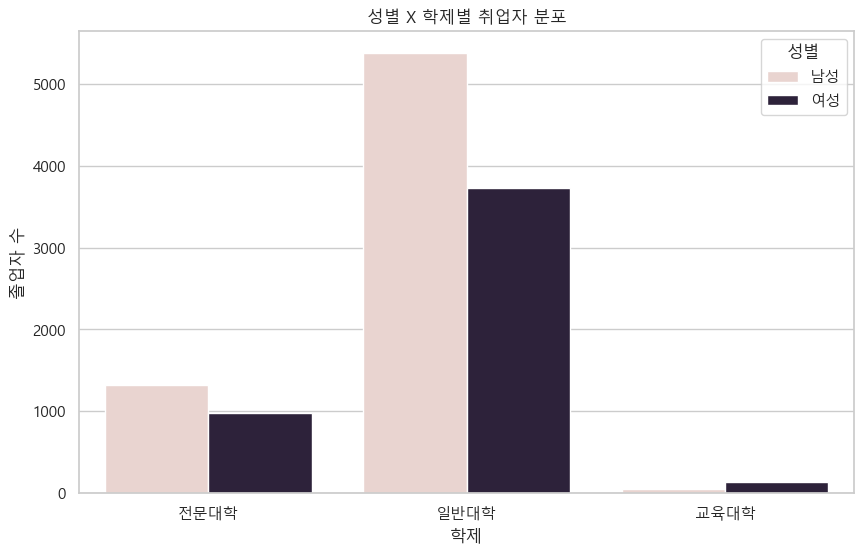

In [130]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_cleaned, x="school", hue="sex")
plt.title("성별 X 학제별 취업자 분포")
plt.xlabel("학제")
plt.ylabel("졸업자 수")
plt.legend(title="성별", labels=["남성", "여성"])
ax.set_xticklabels(["전문대학", "일반대학", "교육대학"])
plt.show()

> 분석

일반대학의 취업자는 남성 5000이상, 여성 3500이상으로 가장 많았으며,  
전문대학은 남성 1000명 이상, 여성 900이상으로, 일반대학 다음으로 많은 취업자 수를 보임.  
교육대학은 남녀 모두 300명 미만의 낮은 취업자 분포를 보임.

### (2) 전공별 X 학제별 취업자 분포

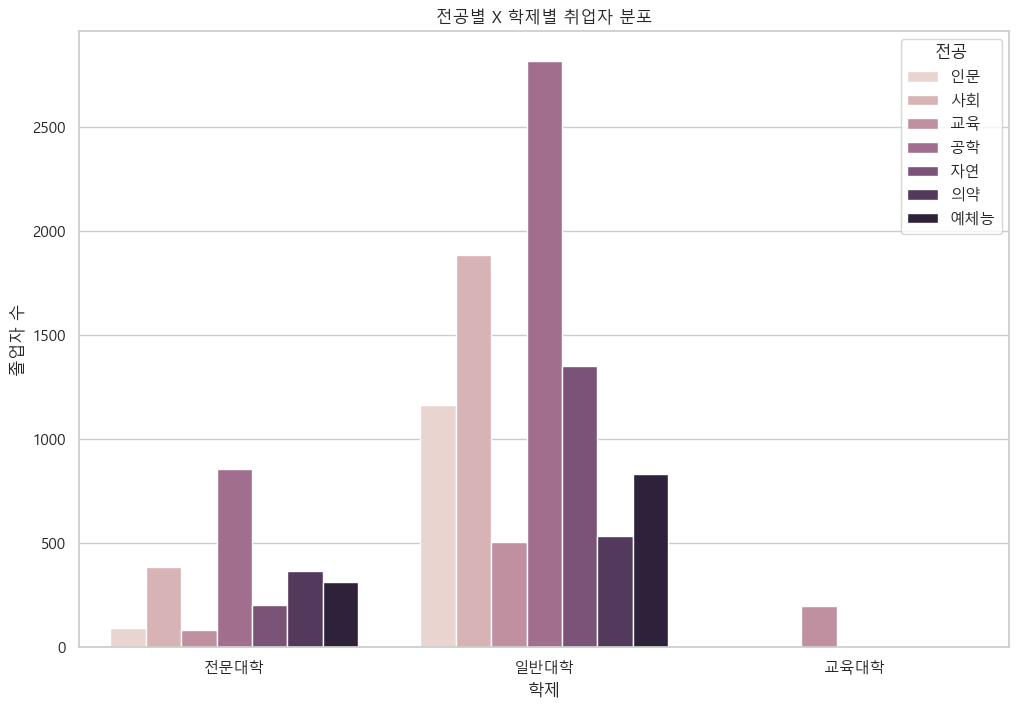

In [133]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_cleaned, x="school", hue="majorcat")
plt.title("전공별 X 학제별 취업자 분포")
plt.xlabel("학제")
plt.ylabel("졸업자 수")
plt.legend(title="전공", labels=["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])
ax.set_xticklabels(["전문대학", "일반대학", "교육대학"])
plt.show()

> 분석

전문대학과 일반대학 모두 공학계열 취업자 수가 가장 많고, 다음으로 사회계열 취업자 수가 가장 많은 양상을 보임.  
일반대학의 취업자 수는 공학, 사회, 자연, 인문, 예체능, 의약, 교육 순이며,  
전문대학의 취업자 수는 공학, 사회, 의약, 예체능, 자연, 인문, 교육 순이다.

## 2. 대학 졸업자 임금 현황

### (1) 성별 X 학제별 월 평균 임금 현황

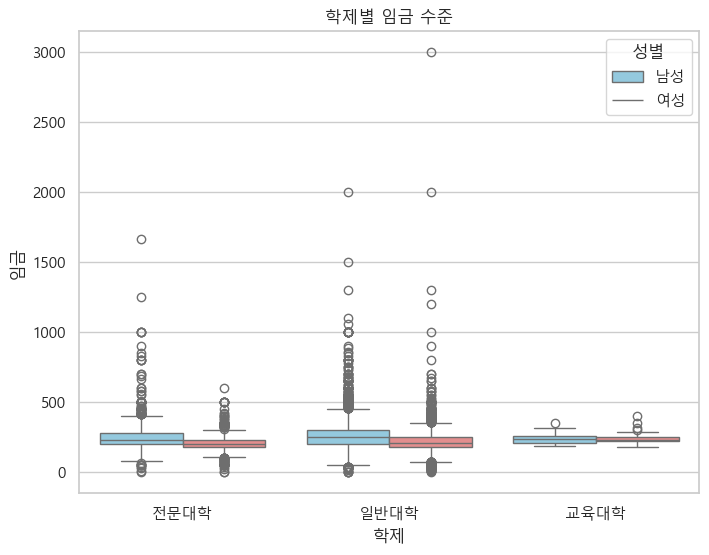

In [165]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x="school", y="a122", hue="sex", palette={1: "skyblue", 2: "lightcoral"})
plt.title("학제별 임금 수준")
plt.xlabel("학제")
plt.ylabel("임금")

ax = plt.gca()
ax.set_xticklabels(["전문대학", "일반대학", "교육대학"])

plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

월 평균 소득의 평균값은 모든 학제가 비슷하게 나타나지만,  
일반적으로 남성의 평균 월 소득이 여성에 비해 높게 나타남.  
분포는 일반대학이 가장 넓고, 교육대학의 분포가 가장 좁은 것으로 나타났음.  
일반대학과 전문대학은 월 임금 400 이상의 이상치가 많이 분포함과 동시에 월 임금 0에 수렴하는 이상치도 다수 존재함.

### (2) 성별 X 전공별 임금 현황

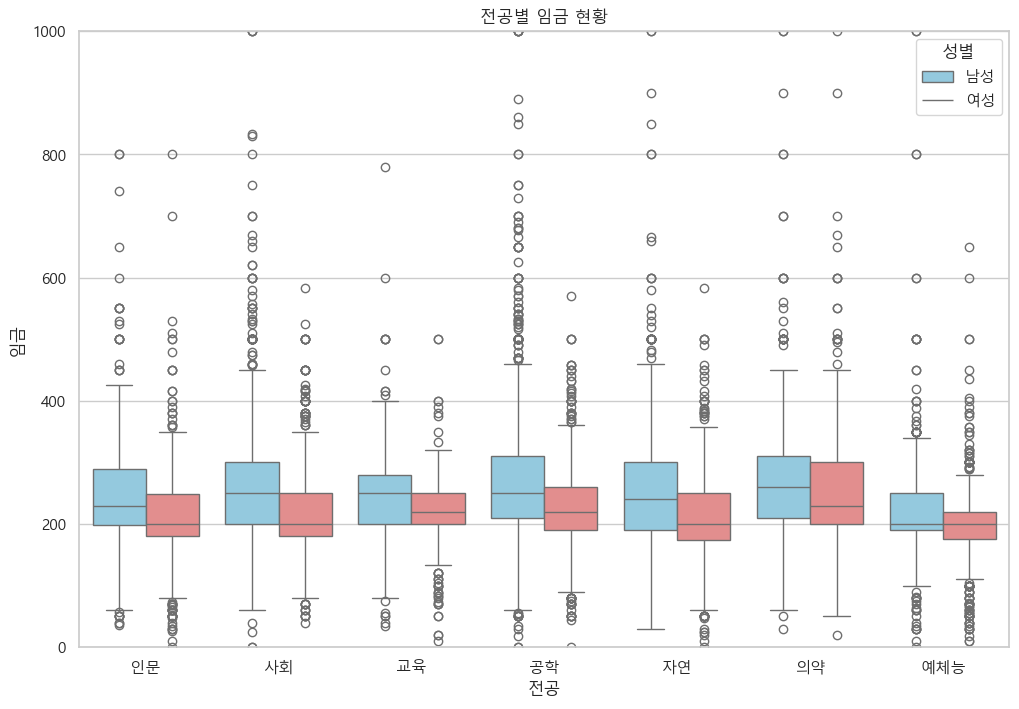

In [169]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_cleaned, x="majorcat", y="a122", hue="sex", palette={1: "skyblue", 2: "lightcoral"})
plt.title("전공별 임금 현황")
plt.xlabel("전공")
plt.ylabel("임금")
plt.ylim(0, 1000)
plt.legend(title="성별", labels=["남성", "여성"])
ax = plt.gca()
ax.set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])
plt.show()

> 분석

전공별 평균 임금의 차이는 크지 않으나,  
남성의 경우 의약과 교육계열이 높고, 예체능이 낮게 나타남.
여성의 경우 의약과 교육, 공학이 높고, 인문, 사회, 자연, 예체능이 낮게 나타남.

남성이 여성에 비해 평균 임금이 높게 나타났으며,
교육계열과 예체능은 비교적 편차가 적음.

## 3. 대학 졸업자 만족도 현황

### (1) 성별 X 학제별 대학 만족도

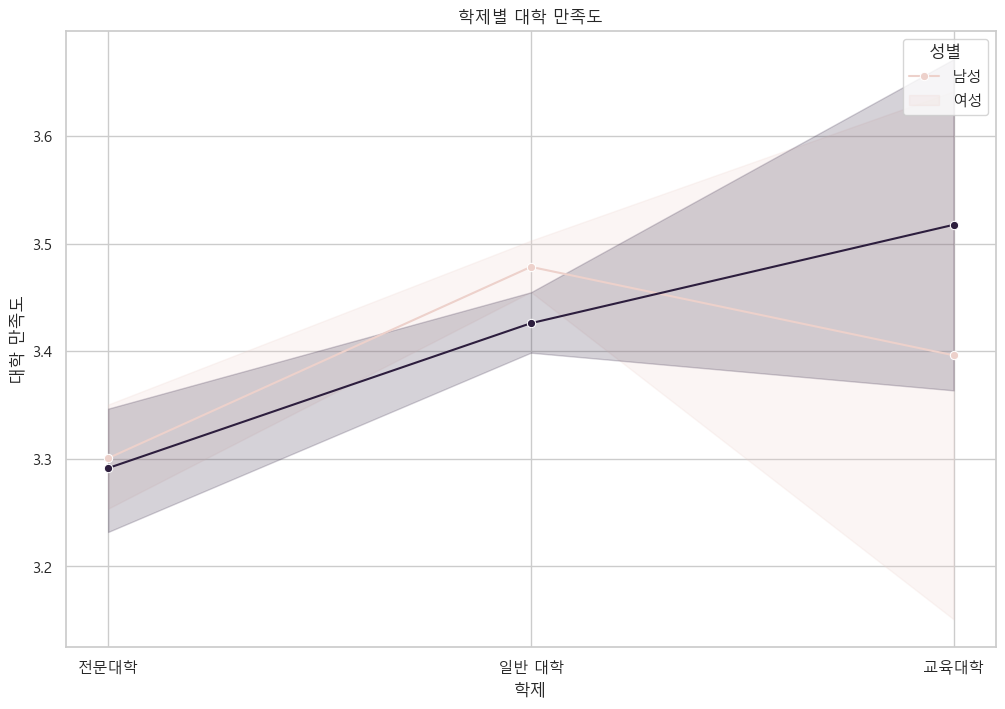

In [175]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x="school", y="f072", hue="sex", marker="o")
plt.title("학제별 대학 만족도")
plt.xlabel("학제")
plt.ylabel("대학 만족도")
plt.xticks(ticks=[1, 2, 3], labels=["전문대학", "일반 대학", "교육대학"])
plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

전공 만족도 역시 성별, 학제별에 따른 차이가 크게 나타나지 않고, 평균 3.0 이상의 만족도를 보임.

여성의 만족도는 교육대학, 일반대학, 전문대학 순으로 높고
남성의 만족도는 일반대학, 교육대학, 전문대학 순으로 높았음.

만족도에서 전문대학은 남성이 0.01, 일반대학은 남성이 0.05, 교육대학은 여성이 0.12 정도 높음.  
크게 유의미한 수치는 아님.

### (2) 성별 X학제별 전공 만족도

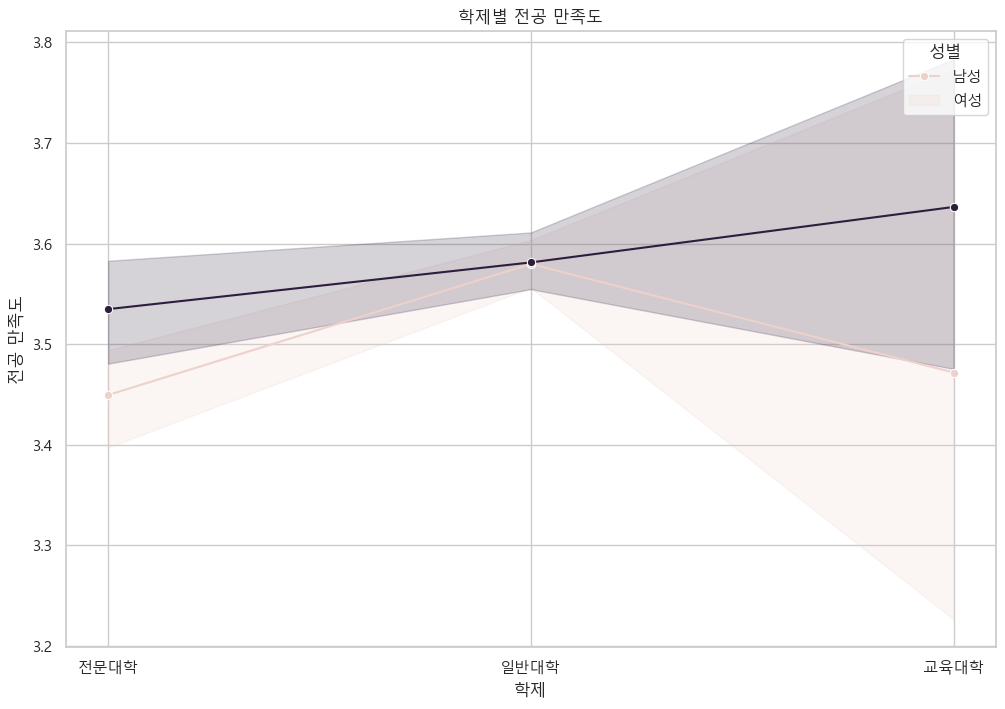

In [177]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x="school", y="f071", hue="sex", marker="o")
plt.title("학제별 전공 만족도")
plt.xlabel("학제")
plt.ylabel("전공 만족도")
plt.xticks(ticks=[1, 2, 3], labels=["전문대학", "일반대학", "교육대학"])
plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

전공 만족도 역시 성별, 학제별에 따른 차이가 크게 나타나지 않고, 평균 3.0 이상의 만족도를 보임.

남성의 만족도는 교육대학, 일반대학, 전문대학 순으로 높고
여성의 만족도는 일반대학, 교육대학, 전문대학 순으로 높았음.

만족도에서 전문대학은 여성이 0.1 높고, 일반대학은 비슷하며, 교육대학은 여성이 0.15 정도 높음.  
크게 유의미한 수치는 아님.

### (3) 성별 X 학제별 직장 만족도

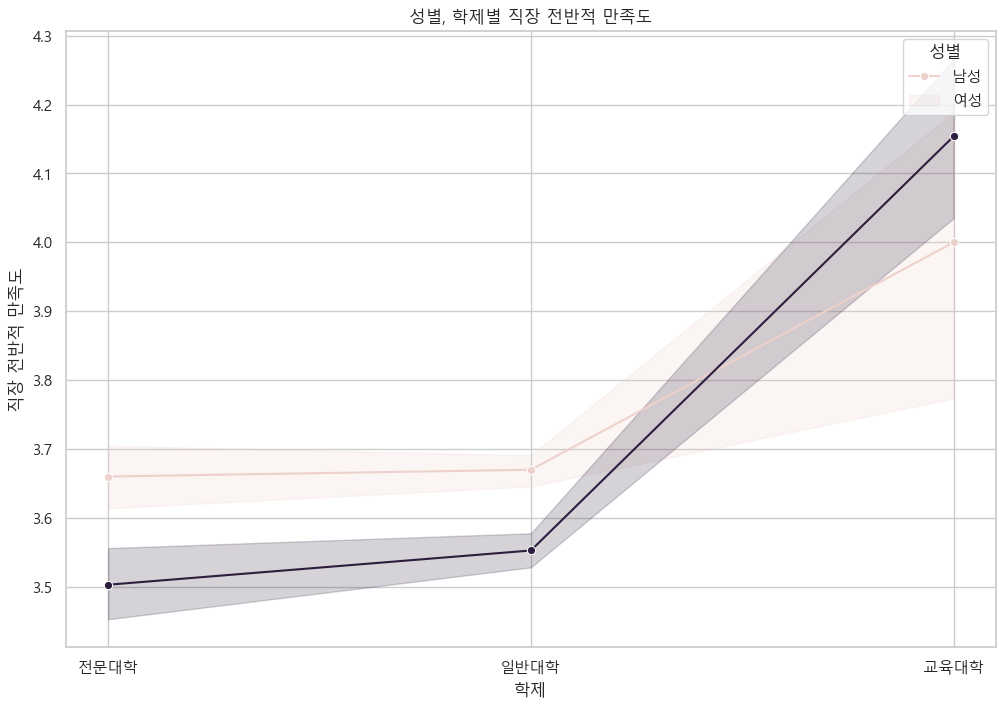

In [178]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x="school", y="a140", hue="sex", marker="o")
plt.title("성별, 학제별 직장 전반적 만족도")
plt.xlabel("학제")
plt.ylabel("직장 전반적 만족도")
plt.xticks(ticks=[1, 2, 3], labels=["전문대학", "일반대학", "교육대학"])
plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

전문대학, 일반대학의 경우 남성이, 교육대학의 경우 여성의 직장 만족도가 더욱 높음.

### (4) 성별 X 전공별 대학 만족도

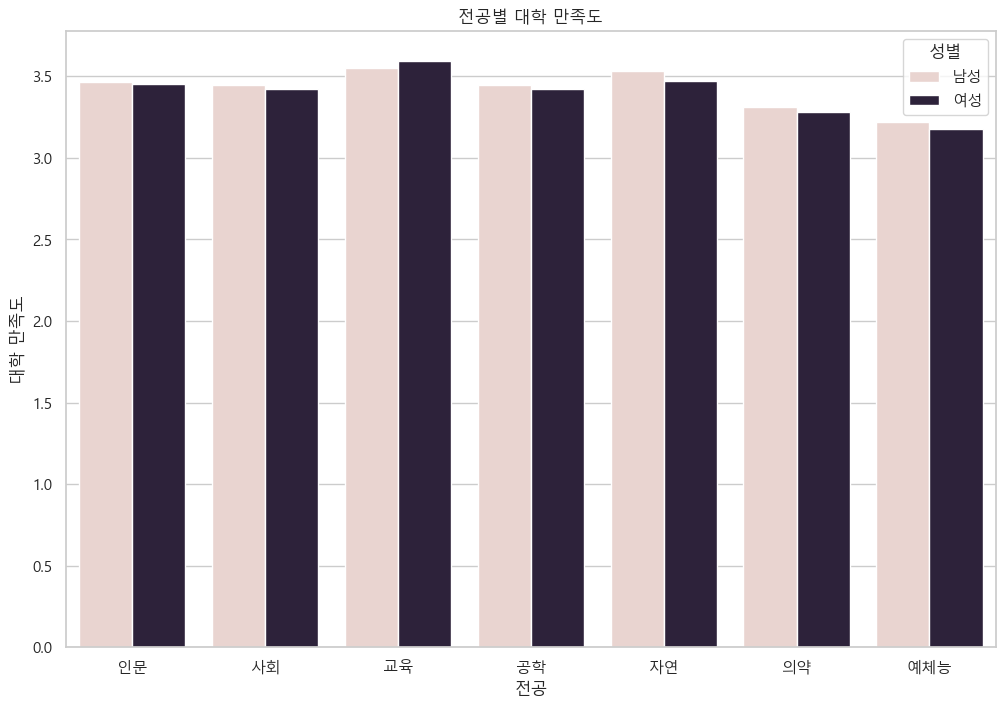

In [154]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_cleaned, x="majorcat", y="f072", hue="sex", ci=None)
plt.title("전공별 대학 만족도")
plt.xlabel("전공")
plt.ylabel("대학 만족도")
plt.legend(title="성별", labels=["남성", "여성"])
ax = plt.gca()
ax.set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])
plt.show()

> 분석

만족도 측면에서, 모두 3.0 이상의 만족도를 보이며 큰 차이는 없으나  
여성의 경우 교육, 자연, 인문, 사회, 공학, 의약, 예체능 순으로 만족하였고  
남성의 경우 교육, 자연, 인문, 공학, 사회, 의약, 예체능 순으로 만족함.

### (5) 성별 X 전공별 전공 만족도

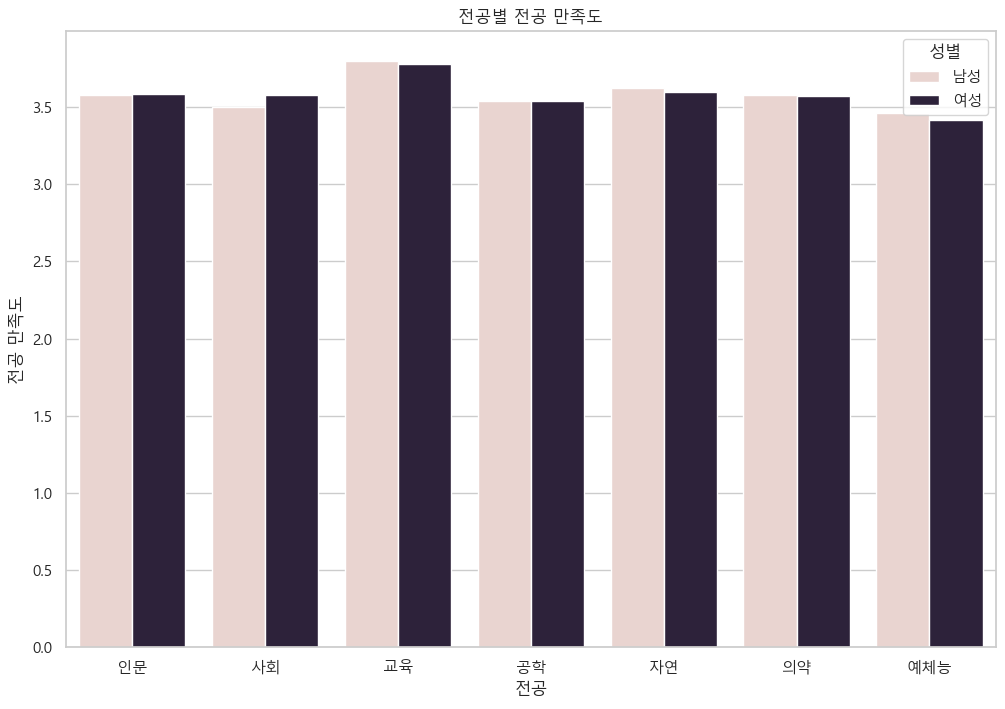

In [155]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df_cleaned, x="majorcat", y="f071", hue="sex", ci=None)
plt.title("전공별 전공 만족도")
plt.xlabel("전공")
plt.ylabel("전공 만족도")
plt.legend(title="성별", labels=["남성", "여성"])
ax = plt.gca()
ax.set_xticklabels(["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])
plt.show()

> 분석

만족도 측면에서, 모두 3.0 이상의 만족도를 보이며 큰 차이는 없으나  
여성의 경우 교육, 인문, 사회, 자연, 의약, 공학, 예체능 순으로 만족하였고  
남성의 경우 교육, 자연, 인문, 의약, 공학, 사회, 예체능 순으로 만족함.

### (6) 성별 X 전공별 직장 만족도

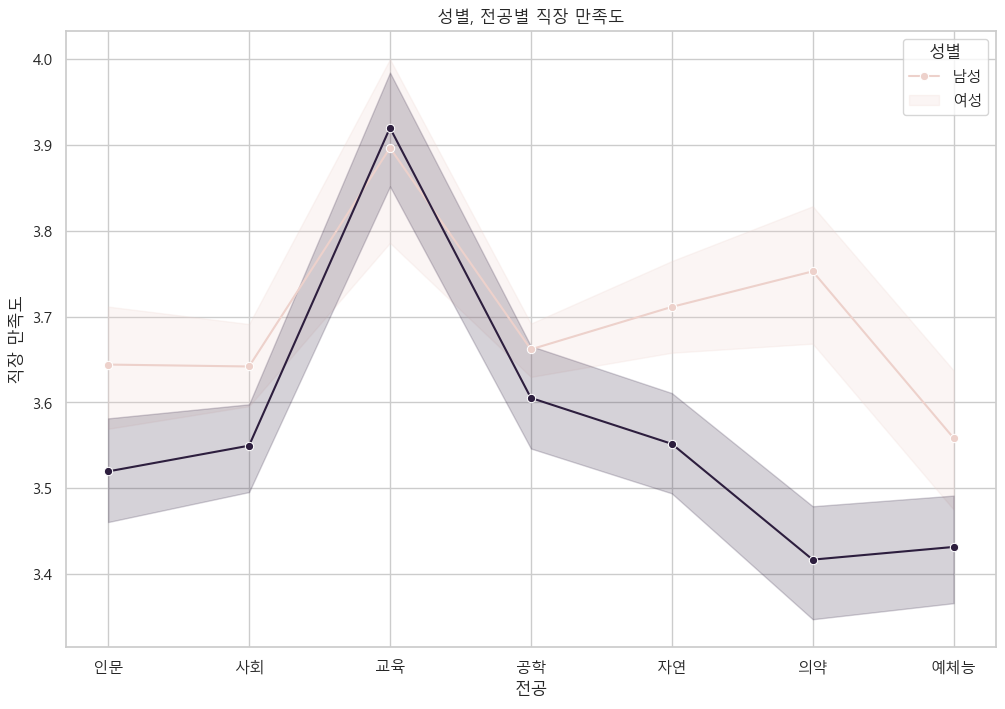

In [183]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x="majorcat", y="a140", hue="sex", marker="o")
plt.title("성별, 전공별 직장 만족도")
plt.xlabel("전공")
plt.ylabel("직장 만족도")
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7], labels=["인문", "사회", "교육", "공학", "자연", "의약", "예체능"])
plt.legend(title="성별", labels=["남성", "여성"])
plt.show()

> 분석

직장 만족도의 경우, 남성 여성 모두 교육계열이 가장 높았으며,  
여성은 의학, 남성은 예체능에서 가장 낮은 직장 만족도를 보임.  

교육분야를 제외한 모든 분야에서 남성의 만족도가 여성의 직장 만족도보다 높았음.

## 4. 졸업자 취업 관련 상관 관계 분석 

### (1) 취업 요인과 취업 상황, 만족도 간 상관관계 분석

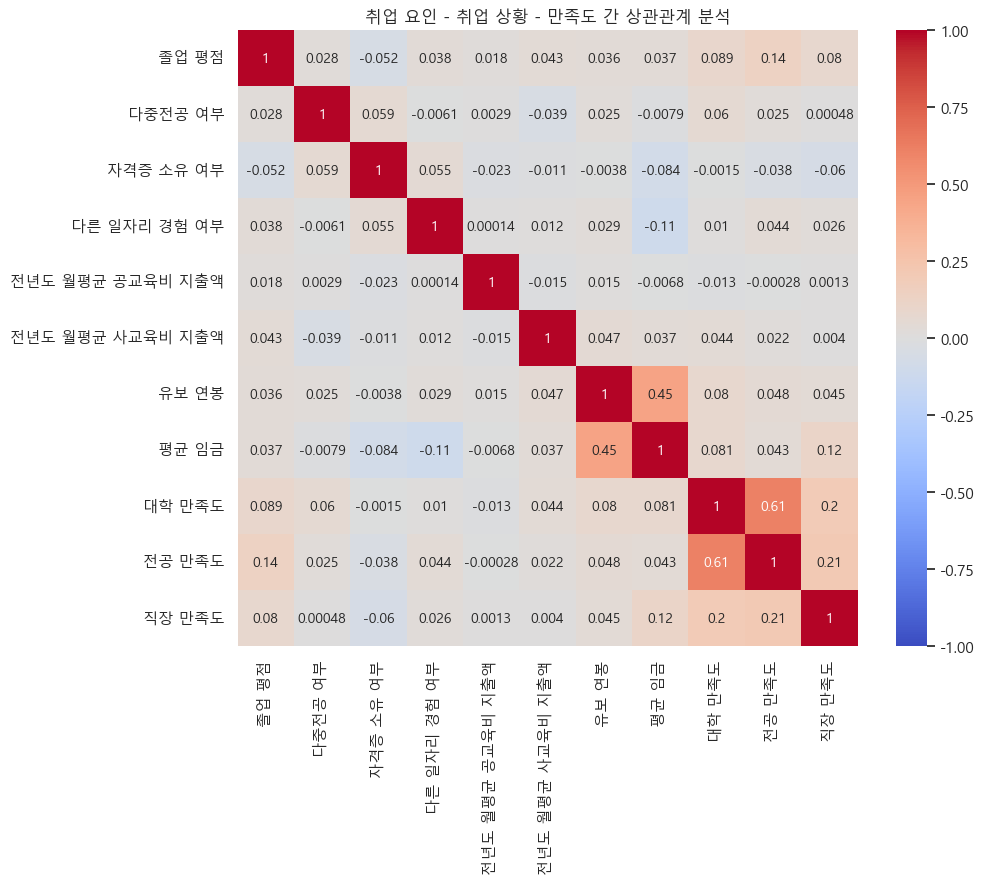

In [190]:
# 데이터 컬럼
correlation_data = df_cleaned[['f074','f023' ,'a153', 'r025', 'r026', 'e001', 'j021', 'a122', 'f072', 'f071', 'a140']]

# 컬럼명 지정
correlation_data.columns = [
    '졸업 평점', 
    '다중전공 여부',
    '자격증 소유 여부',
    '다른 일자리 경험 여부',
    '전년도 월평균 공교육비 지출액',
    '전년도 월평균 사교육비 지출액',
    '유보 연봉',
    '평균 임금', 
    '대학 만족도', 
    '전공 만족도', 
    '직장 만족도'
]

# 상관계수 계산
correlation_matrix = correlation_data.corr()

# 히트맵을 통해 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("취업 요인 - 취업 상황 - 만족도 간 상관관계 분석")
plt.show()

> 분석

대부분의 취업 요인은 평균 임금 및 만족도와 약한 상관관계를 가짐  
대학 및 전공 만족도와 직장 만족도 역시 약한 상관관계를 가짐

유보 연봉과 평균 임금은 0.45의 상관관계를 가짐.

대학 만족도와 전공 만족도는 0.61 수준의 강한 상관관계를 가짐

### (2) 부모 요인과 자녀 대학, 직장 생활 간 상관관계 분석

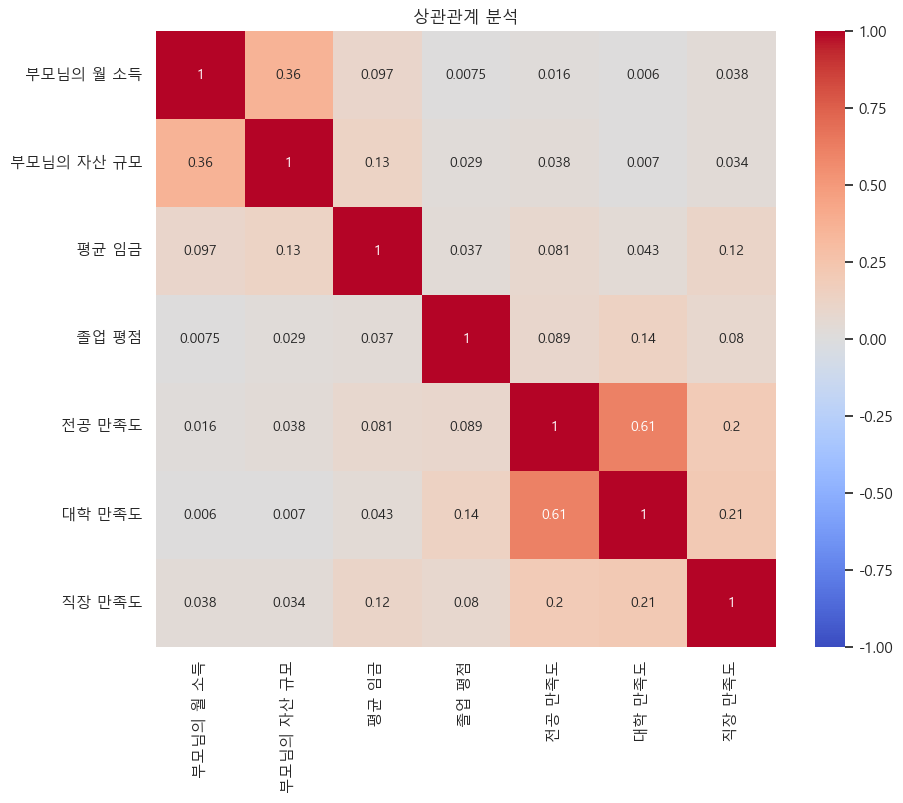

In [191]:
# 데이터 선택
correlation_data2 = df_cleaned[['p035', 'p036', 'a122', 'f074', 'f072', 'f071', 'a140']]

# 컬럼 이름 바꾸기
correlation_data2.columns = [
    '부모님의 월 소득', 
    '부모님의 자산 규모', 
    '평균 임금', 
    '졸업 평점', 
    '전공 만족도', 
    '대학 만족도', 
    '직장 만족도'
]

# 상관계수 계산
correlation_matrix2 = correlation_data2.corr()

# 히트맵을 통해 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("상관관계 분석")
plt.show()


> 분석

부모의 자산규모와 월 소득은 0.36의 상관관계가 있으나,  
부모가 자녀의 평균 임금, 졸업 평점, 전공 만족도, 대학 만족도, 직장 만족도에 미치는 영향은 매우 낮음.

### (3) 직장 요인과 직장 만족도 간 상관관계 분석

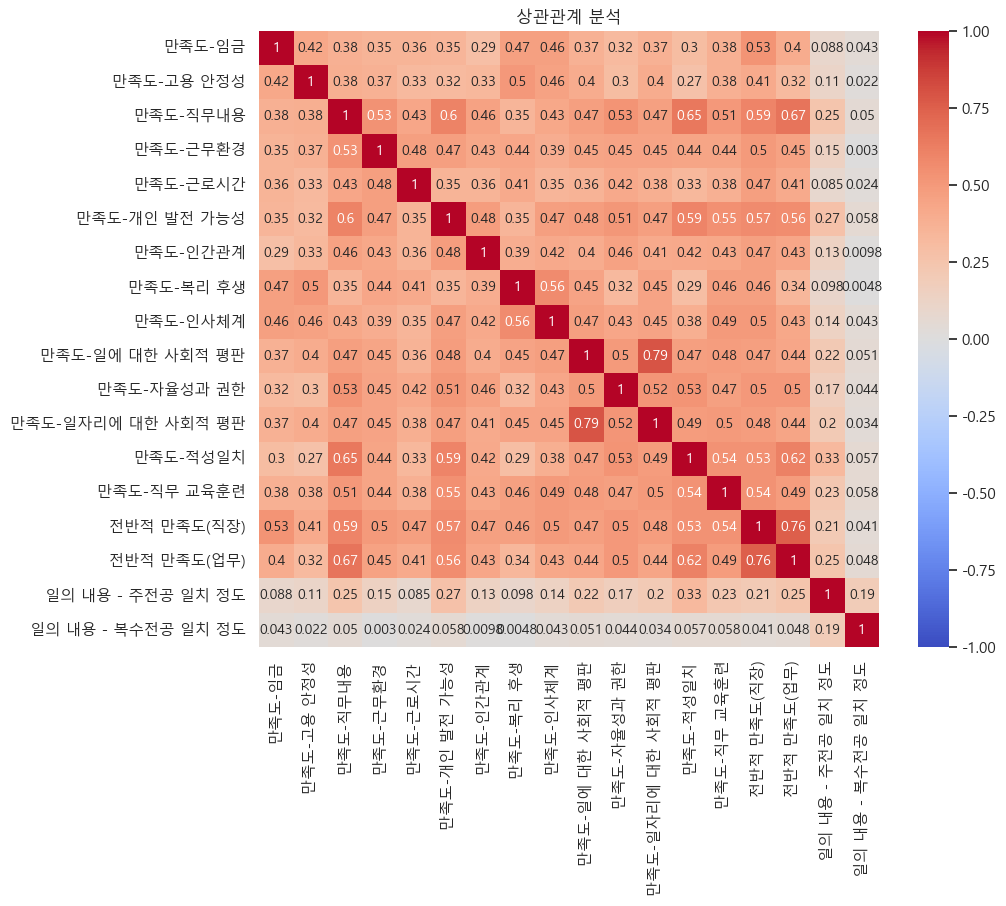

In [203]:
# 데이터 선택
correlation_data2 = df_cleaned[['a126', 'a127', 'a128', 'a129', 'a130', 'a131', 'a132', 'a133', 'a134', 'a135', 'a136', 'a137', 'a138', 'a139' ,'a140', 'a141', 'a144', 'a145']]

# 컬럼 이름 바꾸기
correlation_data2.columns = [
    '만족도-임금',
    '만족도-고용 안정성',
    '만족도-직무내용', 
    '만족도-근무환경', 
    '만족도-근로시간', 
    '만족도-개인 발전 가능성', 
    '만족도-인간관계', 
    '만족도-복리 후생',
    '만족도-인사체계',
    '만족도-일에 대한 사회적 평판',
    '만족도-자율성과 권한',
    '만족도-일자리에 대한 사회적 평판',
    '만족도-적성일치',
    '만족도-직무 교육훈련',
    '전반적 만족도(직장)',
    '전반적 만족도(업무)',
    '일의 내용 - 주전공 일치 정도',
    '일의 내용 - 복수전공 일치 정도'
]

# 상관계수 계산
correlation_matrix2 = correlation_data2.corr()

# 히트맵을 통해 상관관계 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("상관관계 분석")
plt.show()

> 분석

직장 만족도에 직장 요인의 대부분이 높은 상관관계를 보였으며,  
주전공 및 복수전공의 일치 정도는 낮은 상관관계를 보임.

# IV. 분석 결과

주요 인사이트

한계

향후 기대


# V. 결론 및 제언